In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/50_Startups.csv')

In [3]:
label_encoder = LabelEncoder()
df['STATE'] = label_encoder.fit_transform(df['STATE'])

In [5]:
# Select the numerical columns for scaling
numerical_columns = ['RND', 'ADMIN', 'MKT', 'PROFIT']

In [6]:
scaler = StandardScaler()
# Scale the data
df_scaled = df[numerical_columns]
df_scaled = scaler.fit_transform(df_scaled)

In [8]:
Z = linkage(df_scaled, method='ward')

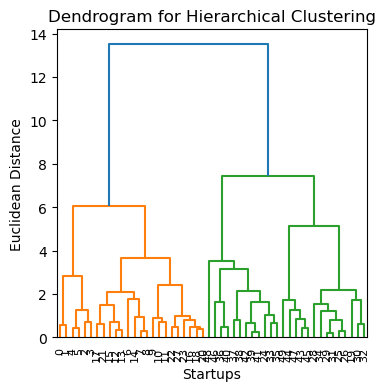

In [10]:
# Step 4: Plot the Dendrogram to decide the number of clusters
plt.figure(figsize=(4,4))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Startups')
plt.ylabel('Euclidean Distance')
plt.show()

In [18]:
clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters
print(df[['RND', 'ADMIN', 'MKT', 'PROFIT', 'Cluster']].head())


         RND      ADMIN        MKT     PROFIT  Cluster
0  165349.20  136897.80  471784.10  192261.83        1
1  162597.70  151377.59  443898.53  191792.06        1
2  153441.51  101145.55  407934.54  191050.39        1
3  144372.41  118671.85  383199.62  182901.99        1
4  142107.34   91391.77  366168.42  166187.94        1


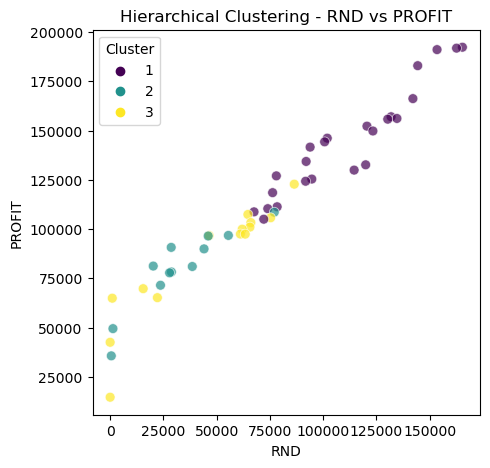

In [17]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['RND'], y=df['PROFIT'], hue=df['Cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Clustering - RND vs PROFIT')
plt.xlabel('RND')
plt.ylabel('PROFIT')
plt.show()